# Titanic survived Project

Project Description The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. 
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.
Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exporatory Data Analysis

In [8]:
# Checking null values 
data.isnull().sum()    # Or data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.isnull().sum()/len(data)*100  # convert data into % 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

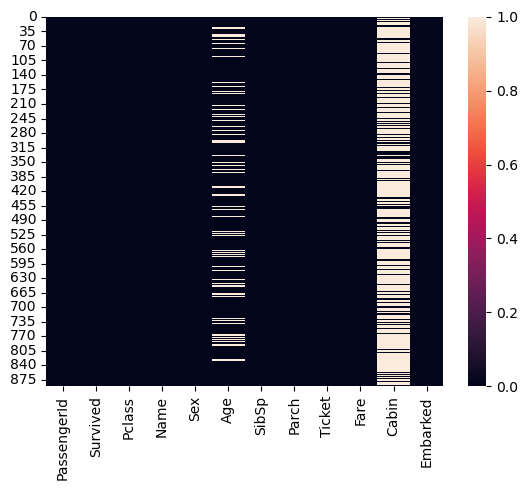

In [10]:
sns.heatmap(data.isnull()) # Null value visualizations 

<Axes: xlabel='Survived', ylabel='count'>

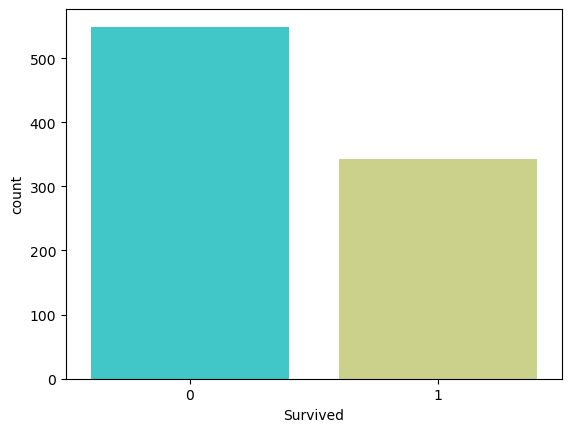

In [11]:
# countplot for death and survival rate
sns.countplot(x = "Survived",data =data,palette ='rainbow')

<Axes: xlabel='Sex', ylabel='count'>

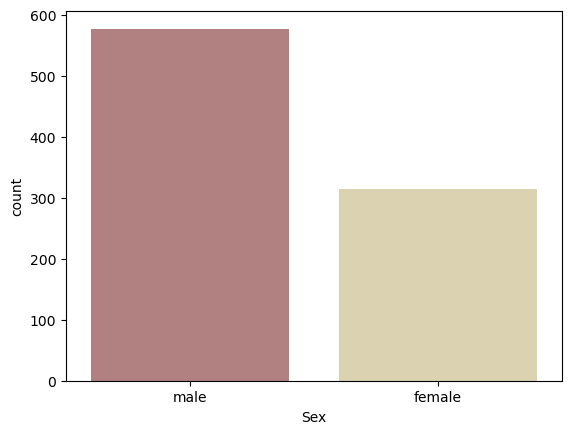

In [12]:
# countplot for male and female
sns.countplot(x ='Sex', data=data,palette ='pink')

<Axes: xlabel='Survived', ylabel='count'>

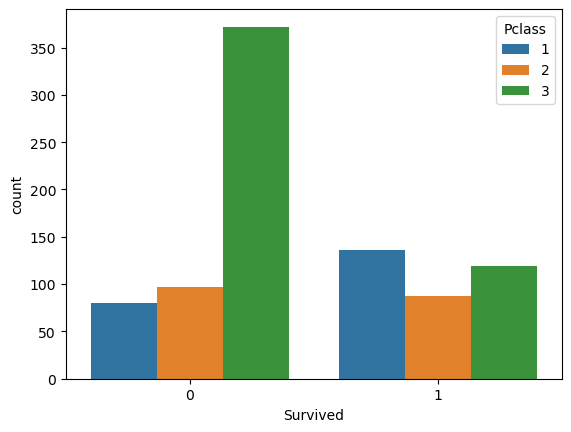

In [13]:
# countplot for people died against Pclass
sns.countplot(x ="Survived", hue="Pclass" , data = data)

<Axes: >

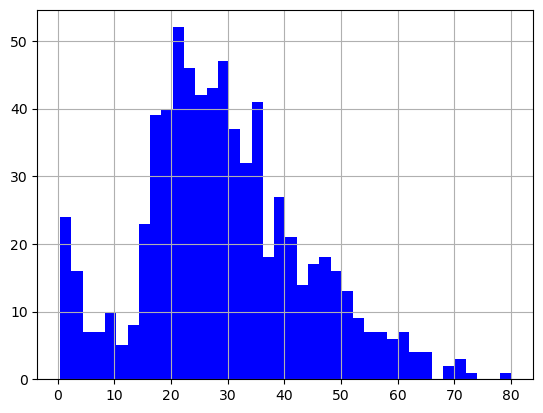

In [14]:
# Distribution of Age 
data['Age'].hist(bins=40,color='blue', alpha=1.0)

<Axes: >

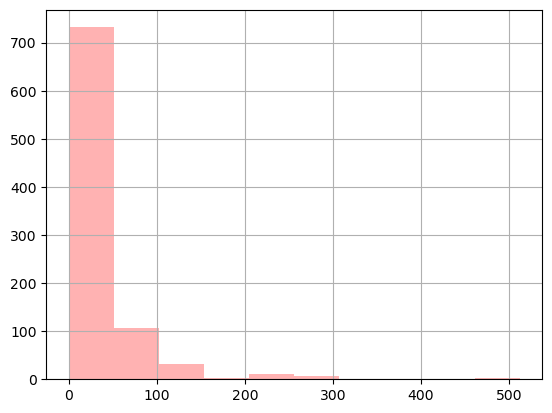

In [15]:
data['Fare'].hist(bins=10,color='red', alpha=0.3)

In [16]:
#  Statistical Summary 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Features Correlations 
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

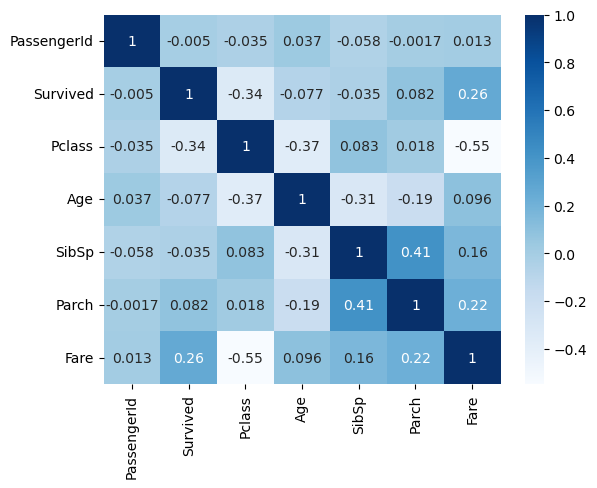

In [18]:
sns.heatmap(data.corr(), cmap='Blues', annot=True)

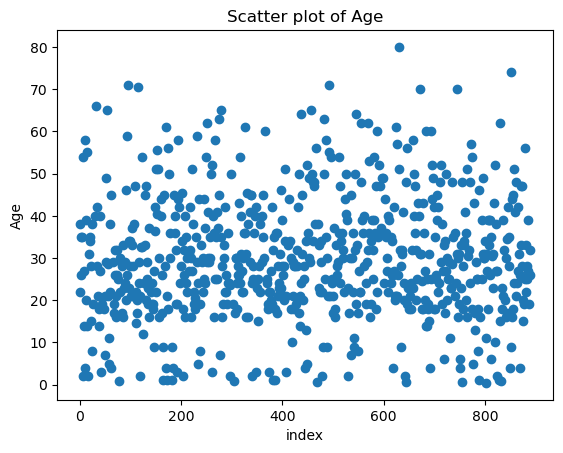

In [19]:
plt.scatter(data.index,data["Age"])
plt.xlabel('index')
plt.ylabel('Age')
plt.title('Scatter plot of Age')
plt.show()

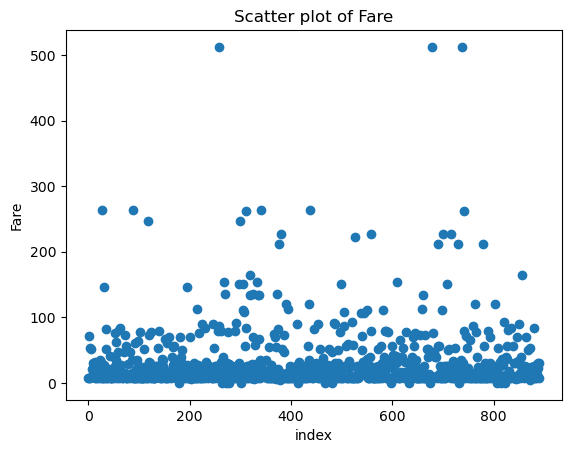

In [20]:
plt.scatter(data.index,data["Fare"])
plt.xlabel('index')
plt.ylabel('Fare')
plt.title('Scatter plot of Fare')
plt.show()

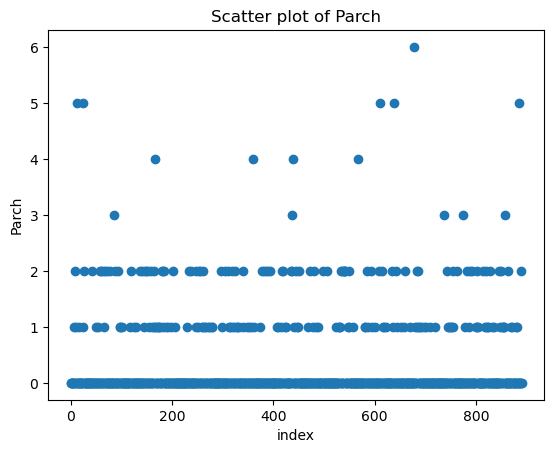

In [21]:
plt.scatter(data.index,data["Parch"])
plt.xlabel('index')
plt.ylabel('Parch')
plt.title('Scatter plot of Parch')
plt.show()

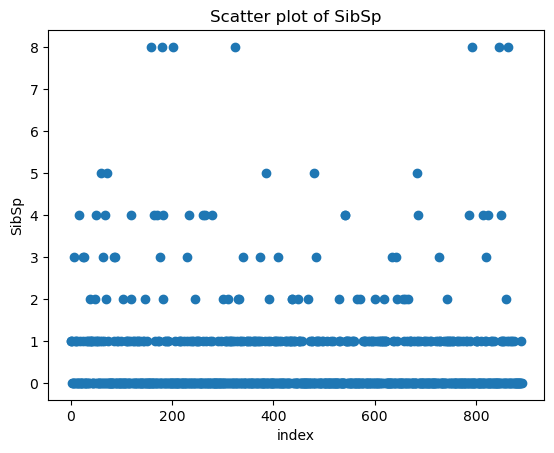

In [22]:
plt.scatter(data.index,data["SibSp"])
plt.xlabel('index')
plt.ylabel('SibSp')
plt.title('Scatter plot of SibSp')
plt.show()

# Data Cleaning 

Outlier Detection 

Text(0.5, 1.0, 'Outliers in data')

<Figure size 1000x1000 with 0 Axes>

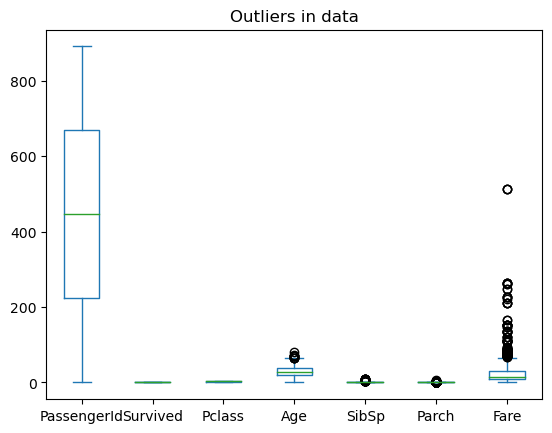

In [23]:
plt.figure (figsize=(10,10))
data.plot(kind='box')
plt.title('Outliers in data')

In [24]:
# Making Method to impute age 
def impute_age(cols):
# We will pass 2 columns as arguments zero for age and columns 1 for Pclass
    Age=cols[0]
    Pclass=cols[1]
    
    # getting null value
    if pd.isnull(Age):
        #returning Avg 37 for 1 st class
        if Pclass==1:
            return 37
        # for 2nd class age 28
        elif Pclass==2:
            return 28
        # for 3rd class age 25
        else:
            return 25
    else:
        return Age
        
# applying above functions 
# col[0] ='Age', & col[1] ='Pclass'
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

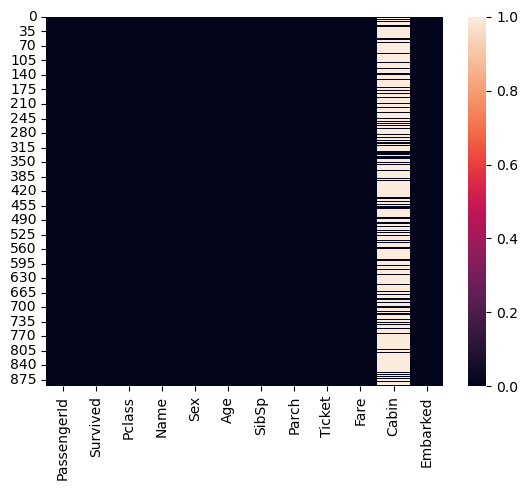

In [25]:
sns.heatmap(data.isnull())

In [26]:
# Droping Cabin column becose high na value 
data.drop('Cabin',inplace = True,axis=1)

<Axes: >

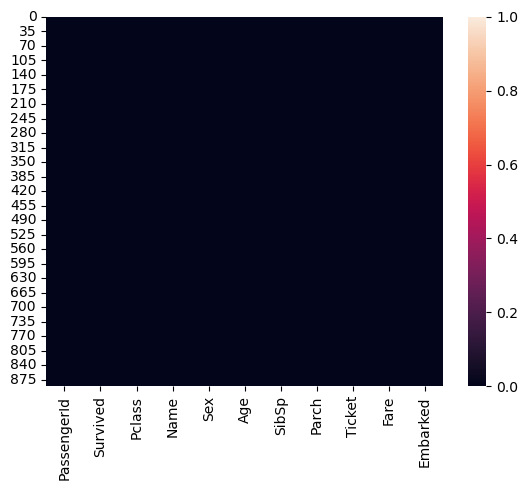

In [27]:
sns.heatmap(data.isnull())

# Outlier Removing 

In [28]:
from scipy import stats
# Drop non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
df_numeric = data[numeric_cols]

# Compute z-scores for the numeric columns
zscore = np.abs(stats.zscore(df_numeric))
threshold = 3
print(np.where(zscore > threshold))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [29]:
df_numeric = df_numeric.loc[(zscore < 3).all(axis=1)]

<Figure size 1600x1400 with 0 Axes>

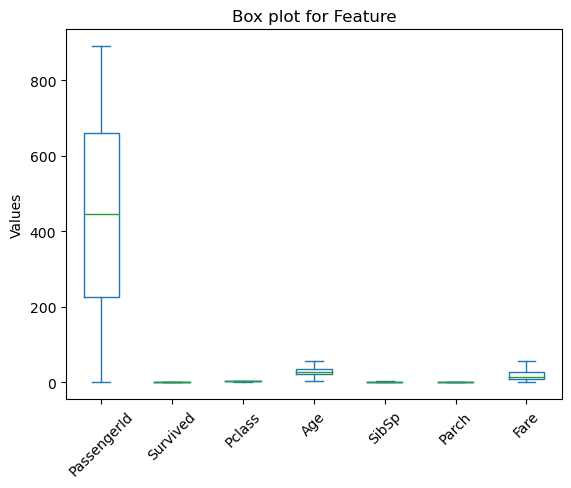

In [30]:
plt.figure(figsize=(16,14))
df_numeric.plot(kind='box', showfliers=False)  # Set showfliers=False to exclude outliers
plt.title('Box plot for Feature')
plt.ylabel('Values')
plt.xticks(rotation=45) 
plt.grid(False)
plt.show()

In [31]:
df_numeric=data # Assing clean data

# Converting Categorcial Features into numerical 

In [32]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [33]:
data.shape

(891, 11)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [35]:
sex = pd.get_dummies(data['Sex'], drop_first =True)
embark= pd.get_dummies(data['Embarked'], drop_first=True)

In [36]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [37]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [38]:
# dropping extra cols
data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [39]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,25.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [40]:
# Concat Numerical Values
data = pd.concat([data,sex,embark],axis=1)
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,25.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [41]:
data.shape

(891, 10)

In [42]:
# Independents and Dependent Features 
X = data.drop(['Survived'], axis=1)  
Y = data['Survived']

In [43]:
# Split Data into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape,Y_train.shape , X_test.shape,Y_test.shape

((712, 9), (712,), (179, 9), (179,))

In [46]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)
pred = logReg.predict(X_test)
                      
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# Model Testing 

In [51]:
new = pd.DataFrame({
    'PassengerId':[999],
    'Pclass':[1],
    'Age':[30],
    'SibSp':[1],
    'Parch':[0],
    'Fare':[100],
    'male':[1],
    'Q':[0],
    'S':[1]
})

'''new = pd.DataFrame({
    'PassengerId':[1000],
    'Pclass':[0],
    'Age':[35],
    'SibSp':[0],
    'Parch':[0],
    'Fare':[99],
    'male':[0],
    'Q':[0],
    'S':[1]
})
'''
# Make Prediction using trained model
pred = logReg.predict(new)

print('Model prediction Varification:', pred)

Model prediction Varification: [1]


In [55]:
new = pd.DataFrame({
    'PassengerId':[5],
    'Pclass':[3],
    'Age':[35.0],
    'SibSp':[0],
    'Parch':[0],
    'Fare':[8],
    'male':[1],
    'Q':[0],
    'S':[1]
})
# Make Prediction using trained model
pred = logReg.predict(new)

print('Model prediction Varification:', pred)

Model prediction Varification: [0]
